### K-Nearest Neighbor (KNN)

#### Handwritten digit recognition

- Each data is a 8X8 (pixel) image of a digit (=64 attributes)
- Feature values: 0->16 (white -> black)
- There are 10 classes: 0, 1, 2, 3, 4, …, 8, 9
- There are 1,797 examples in total

In [1]:
# Import useful libararies used for data management

import numpy as np
import pandas as pd

In [3]:
# load dataset 'digits.csv'

data = pd.read_csv('digits.csv', header=None)

In [4]:
data.head(20)
# row 0 = zero


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
5,0,0,12,10,0,0,0,0,0,0,...,0,0,0,9,16,16,10,0,0,5
6,0,0,0,12,13,0,0,0,0,0,...,0,0,0,1,9,15,11,3,0,6
7,0,0,7,8,13,16,15,1,0,0,...,0,0,0,13,5,0,0,0,0,7
8,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
9,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9


**Please note that column 0-63 presents the black-and-white value of each pixel. And column 64 is the target attribute, which is a digit ranging from 0-9.**

In [5]:
# use the first 64 attributes as independent variables 
features = list(data.columns[0:64])

In [6]:
# use the names of attributes to split them into independent variables X and target variable y
X = data[features]
y = data.iloc[:,64]

In [7]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: 64, Length: 1797, dtype: int64

In [8]:
#import functions for cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

In [9]:
# Import KNeighborsClassifier Model from sklearn
from sklearn.neighbors import KNeighborsClassifier

# try all the values of 'k' from 1 to 13
for k in range(1, 14):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    model = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(model,X,y,cv=10).mean()
    print("When k=%d, accuracy=%.3f" % (k, accuracy))

When k=1, accuracy=0.975
When k=2, accuracy=0.974
When k=3, accuracy=0.977
When k=4, accuracy=0.972
When k=5, accuracy=0.971
When k=6, accuracy=0.968
When k=7, accuracy=0.968
When k=8, accuracy=0.965
When k=9, accuracy=0.965
When k=10, accuracy=0.962
When k=11, accuracy=0.964
When k=12, accuracy=0.964
When k=13, accuracy=0.963


**Questions: Think about why the accuracy is relatively higher when k is an odd number?**

**TODO: please use KNeighborsClassifier(n_neighbors=k, weights='distance') to see what results you can obtain.**

#### from the above testing, it seems using k =4 with distance weight generate the highest accuracy

In [10]:
model_f = KNeighborsClassifier(n_neighbors=3,weights='distance')

In [11]:
model_f.fit(X,y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [12]:
y_pred = cross_val_predict(model_f,X,y,cv=10)

In [13]:
# show a final classification report demonstrating the accuracy of the classifier for each digit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# evaluate result 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
print("Accuracy:",cross_val_score(model_f,X,y,cv=10).mean())

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report
print("Classification Report:",classification_report(y_pred, y))

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("Confusion Matrix:", confusion_matrix(y_pred, y))


Accuracy: 0.9771849782743638
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.99      0.93      0.96       193
           2       0.97      1.00      0.98       171
           3       0.96      0.97      0.96       180
           4       0.98      0.99      0.99       179
           5       0.98      0.97      0.98       183
           6       0.99      0.98      0.99       182
           7       0.99      0.99      0.99       180
           8       0.97      0.97      0.97       174
           9       0.95      0.97      0.96       177

    accuracy                           0.98      1797
   macro avg       0.98      0.98      0.98      1797
weighted avg       0.98      0.98      0.98      1797

Confusion Matrix: [[178   0   0   0   0   0   0   0   0   0]
 [  0 180   4   0   1   0   1   0   6   1]
 [  0   0 171   0   0   0   0   0   0   0]
 [  0   0   1 175   0   0   0   0   0   4]

**Next, we show the image of the digit and the prediction.**

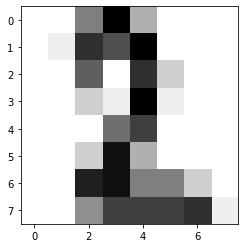

In [14]:
# we use the iloc function to choose the 23rd example
image = X.iloc[22,:]

prediction = model_f.predict([image])[0]

import matplotlib.pyplot as plt
%matplotlib inline

imgdata = np.array(image, dtype='float')
# convert the image for a 64-dim array to an 8 x 8 image
pixels = imgdata.reshape((8,8))
plt.imshow(pixels,cmap='binary')

In [15]:
print("KNN thinks that digit is :",prediction)

KNN thinks that digit is : 2
